# 1.Import libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import f1_score, confusion_matrix, classification_report 
from sklearn.model_selection import learning_curve
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

In [268]:
data_frame=pd.read_excel("C:/Users/Sos/data/inflammations.xlsx",
names = ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains',
       'Burning of urethra, itch, swelling of urethra outlet ', 'decision: Inflammation of urinary bladder',
       'decision: Nephritis of renal pelvis origin'])

# 2.Data Exploration 

#Show  tail of dataset

In [122]:
data_frame.tail()

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
115,41.5,no,no,no,no,no,no,no
116,41.5,yes,yes,no,yes,no,no,yes
117,41.5,no,yes,yes,no,yes,no,yes
118,41.5,no,yes,yes,no,yes,no,yes
119,35.5,no,yes,no,no,no,no,no


In [123]:
data_frame.shape

(120, 8)

In [124]:
data_frame.dtypes.value_counts()

object     7
float64    1
dtype: int64

In [125]:
data_frame.describe()

,Temperature of patient
count,120.000000
mean,38.724167
std,1.819132
min,35.500000
25%,37.100000
50%,37.950000
75%,40.600000
max,41.500000


In [126]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Temperature of patient                                 120 non-null    float64
 1   Occurrence of nausea                                   120 non-null    object 
 2   Lumbar pain                                            120 non-null    object 
 3   Urine pushing                                          120 non-null    object 
 4   Micturition pains                                      120 non-null    object 
 5   Burning of urethra, itch, swelling of urethra outlet   120 non-null    object 
 6   decision: Inflammation of urinary bladder              120 non-null    object 
 7   decision: Nephritis of renal pelvis origin             120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


In [145]:
data_frame.isnull().sum()

Temperature of patient                                   0
Occurrence of nausea                                     0
Lumbar pain                                              0
Urine pushing                                            0
Micturition pains                                        0
Burning of urethra, itch, swelling of urethra outlet     0
decision: Inflammation of urinary bladder                0
decision: Nephritis of renal pelvis origin               0
dtype: int64

<AxesSubplot:>

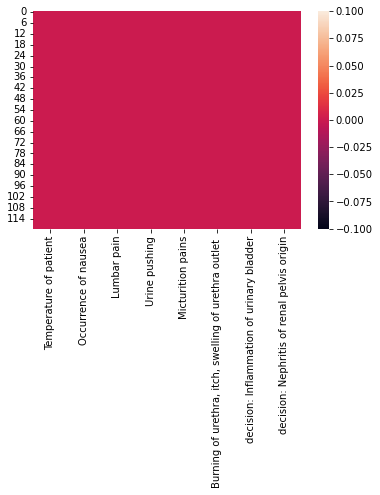

In [128]:
sns.heatmap(data_frame.isna()) #graphe of missing values

In [129]:
data_frame['decision: Inflammation of urinary bladder'].value_counts(normalize=True) #The percentage of each value in the columns.

no     0.508333
yes    0.491667
Name: decision: Inflammation of urinary bladder, dtype: float64

In [130]:
data_frame['decision: Nephritis of renal pelvis origin'].value_counts(normalize=True)

no     0.583333
yes    0.416667
Name: decision: Nephritis of renal pelvis origin, dtype: float64

In [131]:
for col in data_frame.select_dtypes('object'): #The value categories for each column of type 'object'.
    print(f'{col:*<90},{data_frame[col].unique()}')
        

Occurrence of nausea**********************************************************************,['no' 'yes']
Lumbar pain*******************************************************************************,['no' 'yes']
Urine pushing*****************************************************************************,['yes' 'no']
Micturition pains*************************************************************************,['yes' 'no']
Burning of urethra, itch, swelling of urethra outlet *************************************,['yes' 'no']
decision: Inflammation of urinary bladder*************************************************,['yes' 'no']
decision: Nephritis of renal pelvis origin************************************************,['no' 'yes']


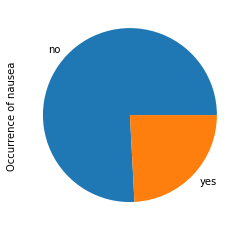

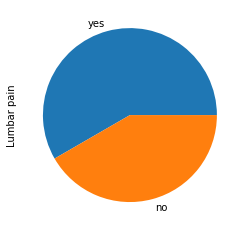

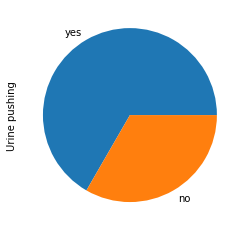

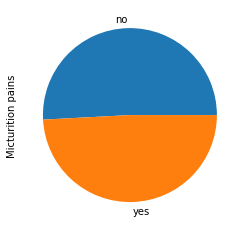

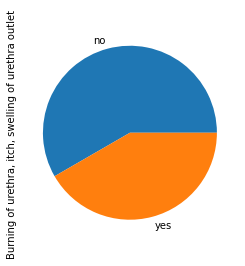

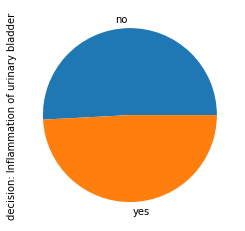

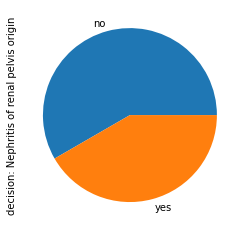

In [132]:
for col in data_frame.select_dtypes('object'): #affiche le nombre de yes et no de chaque colonne avec un graphique pie(cammembert)
    plt.figure()
    data_frame[col].value_counts().plot.pie()

# 3.Data preprocessing

In [134]:
code={'yes':1,'no':0} #encoding

In [135]:
def encodage(data_frame): 
    code={'yes':1,'no':0}
    for col in data_frame.select_dtypes('object').columns:
        data_frame.loc[:,col]  = data_frame[col].map(code)
    
    return data_frame

In [254]:
encodage(data_frame)

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,35.9,0,0,1,1,1,1,0
1,35.9,0,1,0,0,0,0,0
2,36.0,0,0,1,1,1,1,0
3,36.0,0,1,0,0,0,0,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.5,0,0,0,0,0,0,0
116,41.5,1,1,0,1,0,0,1
117,41.5,0,1,1,0,1,0,1
118,41.5,0,1,1,0,1,0,1


In [137]:
data_frame.dtypes.value_counts()

int64      7
float64    1
dtype: int64

#Draw a histogram for each column

C:\Users\Sos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

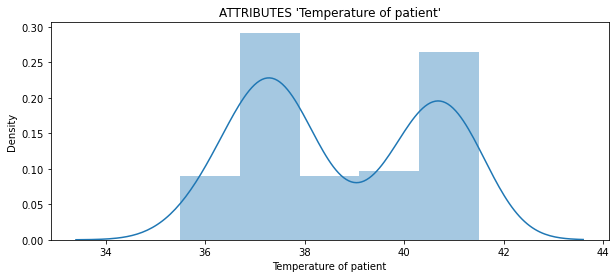

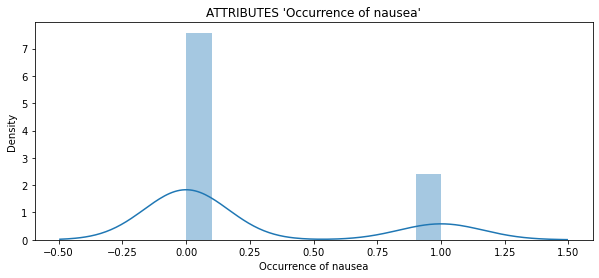

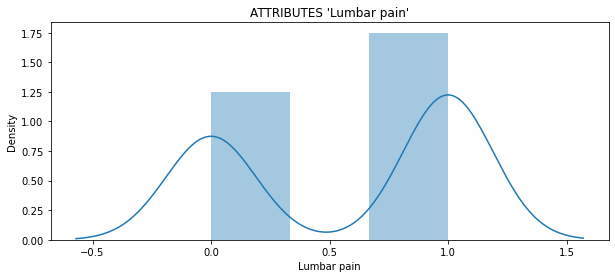

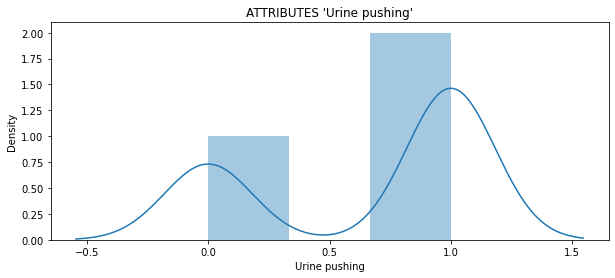

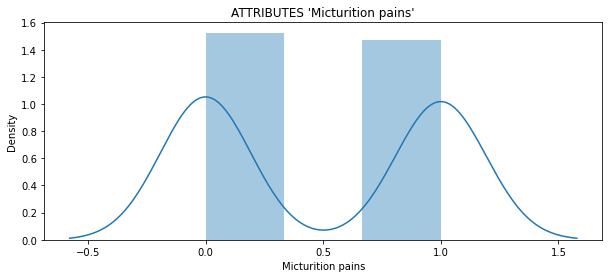

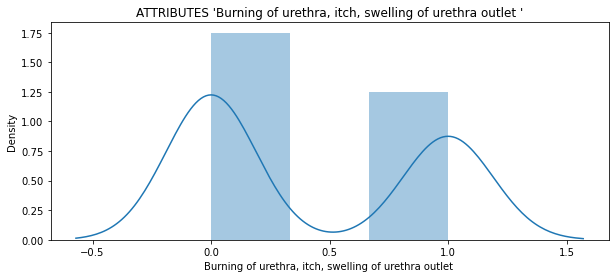

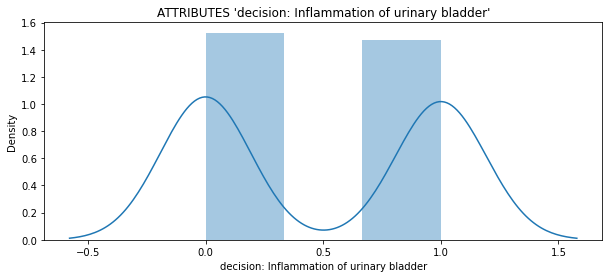

In [139]:
for i in data_frame.columns[:-1]:
    plt.figure(figsize=(10,4))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.distplot(data_frame[i])

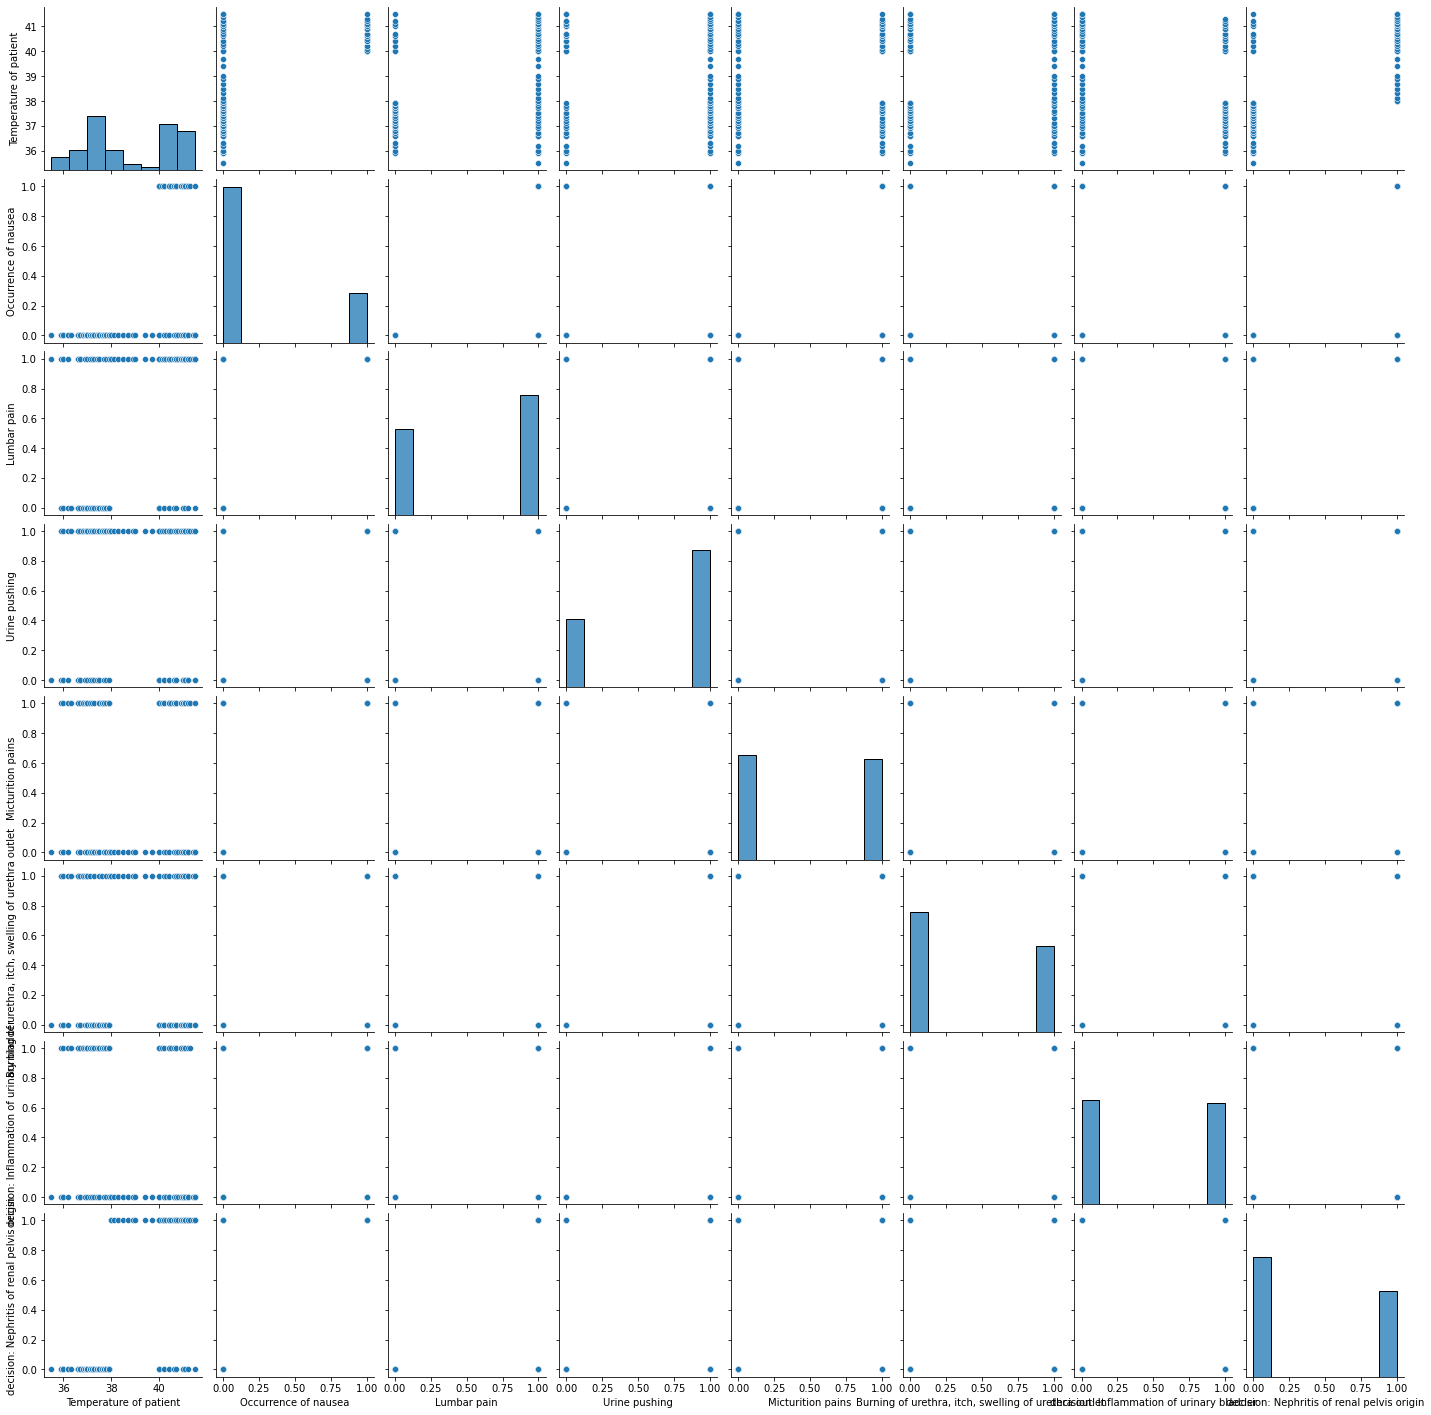

In [140]:
sns.pairplot(data=data_frame) #visualize the relationships and distributions between pairs of variables.


# 4.Split data into train and test sets

In [246]:
trainset, testset=train_test_split(data_frame,test_size=0.2,random_state=0)

In [229]:
def preprocessing(data_frame): #A function that splits the dataset into a 1x1 array (vector) containing 'Y' and 'Z' and an array 'x' for the remaining attributes.
    
    data_frame=encodage(data_frame)
    
    X= data_frame.drop(['decision: Inflammation of urinary bladder','decision: Nephritis of renal pelvis origin'], axis=1)
    Y= data_frame['decision: Inflammation of urinary bladder']
    Z=data_frame['decision: Nephritis of renal pelvis origin']
    print(Y.value_counts())
    print(Z.value_counts())

    return (X, Y, Z)

In [219]:
X_test,Y_test,Z_test=preprocessing(testset)

1    12
0    12
Name: decision: Inflammation of urinary bladder, dtype: int64
0    15
1     9
Name: decision: Nephritis of renal pelvis origin, dtype: int64


In [ ]:
X_train,Y_train,Z_train=preprocessing(trainset)

# 4.Build decision tree model

In [221]:
model=DecisionTreeClassifier(random_state=0)

# 5.Evaluate model

#for decision: Inflammation of urinary bladder

In [223]:
def evaluation(model):
    model.fit(X_train,Y_train)
    ypred= model.predict(X_test)
    
    print(confusion_matrix(Y_test,ypred))
    print(classification_report(Y_test,ypred))
    print(ypred)
    N, train_score, val_score= learning_curve(model, X_train, Y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1),label='train score')
    plt.plot(N, val_score.mean(axis=1),label='validation score')
    plt.legend()


[[12  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

[1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1]


C:\Users\Sos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


1.0

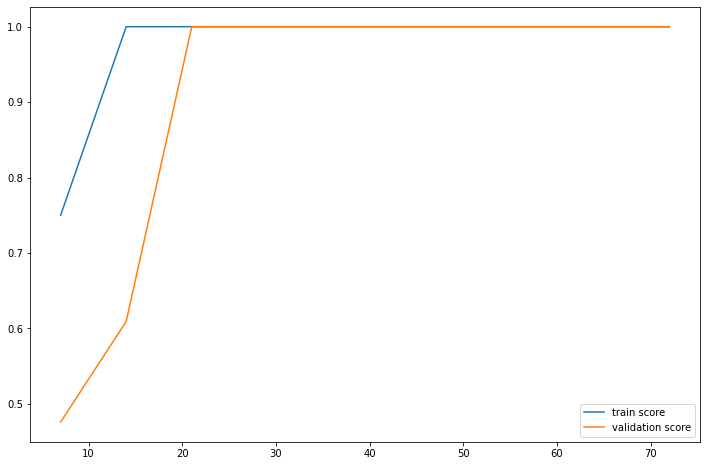

In [224]:
evaluation(model)
model.score(X_test, Y_test)


#for decision: Nephritis of renal pelvis origin

In [165]:
def evaluation2(model):
    model.fit(X_train,Z_train)
    zpred= model.predict(X_test)
    
    print(confusion_matrix(Z_test,zpred))
    print(classification_report(Z_test,zpred))
    
    N, train_score, val_score= learning_curve(model, X_train, Z_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1),label='train score')
    plt.plot(N, val_score.mean(axis=1),label='validation score')
    plt.legend()


[[26  0]
 [ 3 19]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.86      0.93        22

    accuracy                           0.94        48
   macro avg       0.95      0.93      0.94        48
weighted avg       0.94      0.94      0.94        48



C:\Users\Sos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\Sos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


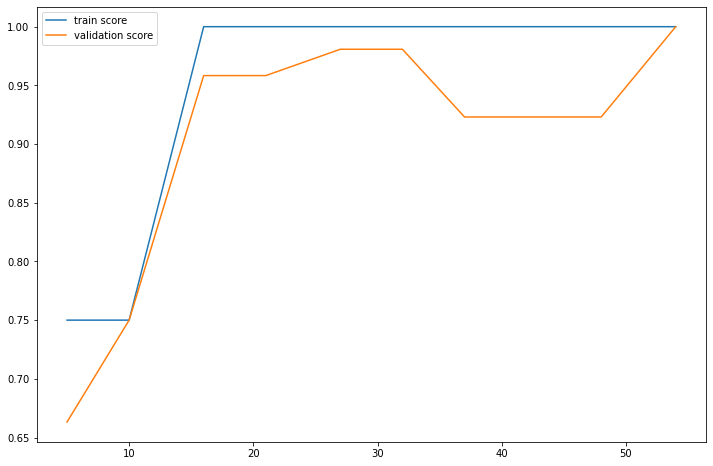

In [166]:
evaluation2(model)